<span style='font-size:150%'>데이터셋 분석 및 시각화 (10점) - 파이썬 라이브러리를 사용하여 분석 및 시각화</span>   

파일명 : 3_Data analysis.ipynb

그냥 각각의 상관관계를 스케일링 된 데이터로 한 그래프로 나타내서 보여주고 주가는 굉장히 복잡한 요소들에 의해 결정되기 때문에 한 눈에 알기 쉽지 않고, 이를 알기 위해서는 깊은 공부가 필요함을 알 수 있다라고 적어주면 될 듯.

데이터를 분석해보고, 문제점이 있으면 이를 확인하고 데이터를 수정하는 과정을 진행하고자 한다.

=====================================================================================================================   
# 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager

import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False # 음수 데이터에 마이너스 표시

import seaborn as sns

#텍스트 형식의 클래스를 숫자로 변환시킬 때 필요하다
from sklearn.preprocessing import LabelEncoder

# 데이터의 값을 0 ~ 1 범위
from sklearn.preprocessing import MinMaxScaler

=====================================================================================================================   
# 데이터 불러오기

In [2]:
data_set=pd.read_csv("D:/ai/Final/Data set_1.csv")

In [3]:
data_set

,종가,시가,고가,저가,거래량,변동
0,46300.0,46200.0,46550.0,46100.0,10528665.0,주가 상승
1,46000.0,46400.0,46450.0,45400.0,11224077.0,주가 하락 또는 변동 없음
2,45500.0,45900.0,46250.0,45450.0,11828104.0,주가 하락 또는 변동 없음
3,46500.0,45800.0,46500.0,45750.0,11543389.0,주가 상승
4,46050.0,46800.0,46800.0,46000.0,7678719.0,주가 하락 또는 변동 없음
...,...,...,...,...,...,...
594,72900.0,72400.0,73500.0,71900.0,28490496.0,주가 상승
595,71700.0,72200.0,72900.0,71600.0,25000338.0,주가 하락 또는 변동 없음
596,73900.0,72100.0,73900.0,72000.0,24077996.0,주가 상승
597,72900.0,72700.0,73800.0,72500.0,39882928.0,주가 하락 또는 변동 없음


<span style='font-size:250%'>데이터 전처리 시작</span>

=====================================================================================================================   
# 텍스트 형식의 클래스를 숫자로 변환한다.

In [4]:
dataset=data_set.values
Y_obj=dataset[:,5]
len(Y_obj)

599

In [5]:
Y_obj

array(['주가 상승', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승', '주가 상승', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 상승', '주가 상승', '주가 상승', '주가 상승', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승', '주가 하락 또는 변동 없음',
       '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승', '주가 상승', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 상승', '주가 상승', '주가 상승', '주가 상승', '주가 상승',
       '주가 하락 또는 변동 없음', '주가 상승', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음',
       '주가 하락 또는 변동 없음', '주가 상승', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음',
       '주가 하락 또는 변동 없음', '주가 상승', '주가 하락 또는 변동 없음', '주가 상승', '주가 상승',
       '주가 상승', '주가 상승', '주가 상승', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음',
       '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 하락 또는 변동 없음', '주가 상승',
       '주가 상승', '주가 하락 또는 변동 없음', '주가 상승', '주가 하락 또는 변동 없음',
       '주가 하락 또는 변동 없음', '주가 상승', '주가 

In [6]:
# 문자열 클래스를 숫자로 변환
e = LabelEncoder()
Y=e.fit_transform(Y_obj)

# 0 => 주가 상승  
# 1 => 주가 하락 및 변동 없음

Y

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [7]:
e.classes_

array(['주가 상승', '주가 하락 또는 변동 없음'], dtype=object)

In [8]:
# numpy 형식의 데이터를 pandas 형식으로 변환한다.
Y_data = pd.DataFrame(Y)

In [9]:
data_set['변동']=Y_data

In [10]:
data_set

,종가,시가,고가,저가,거래량,변동
0,46300.0,46200.0,46550.0,46100.0,10528665.0,0
1,46000.0,46400.0,46450.0,45400.0,11224077.0,1
2,45500.0,45900.0,46250.0,45450.0,11828104.0,1
3,46500.0,45800.0,46500.0,45750.0,11543389.0,0
4,46050.0,46800.0,46800.0,46000.0,7678719.0,1
...,...,...,...,...,...,...
594,72900.0,72400.0,73500.0,71900.0,28490496.0,0
595,71700.0,72200.0,72900.0,71600.0,25000338.0,1
596,73900.0,72100.0,73900.0,72000.0,24077996.0,0
597,72900.0,72700.0,73800.0,72500.0,39882928.0,1


=====================================================================================================================   
# 데이터 시각화

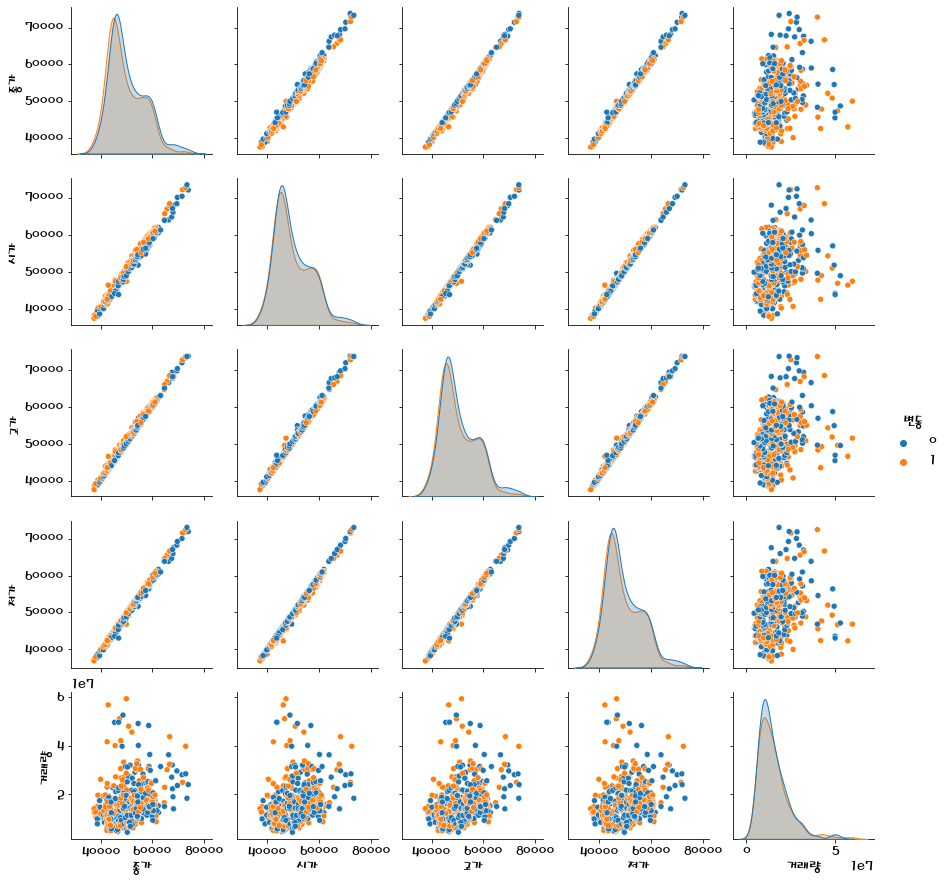

In [11]:
font_path = "C:\\Windows\\Fonts\\HMKMMAG.TTF"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14) 

#seaborn에서 제공하는 pairplot() 함수 사용
sns.pairplot(data_set, hue='변동')  #상관도 그래프
# 1은 주가 하락 또는 변동 없음
# 0은 주가 상승
plt.show()

유의미한 데이터가 아님을 알 수 있다.

[이유 분석]    

1.주가 데이터는 보통 함께 움직이기 때문에 큰 의미가 없다.  
2.주가는 시계열 데이터를 기반으로 예측해야 하기 때문에 단순히 하루하루의 데이터들을 시각화하는 것은 의미가 없다.  

[무엇을 할 수 있을까?] 

1.의 문제점을 보완할 수 있다.   
=> 각 데이터 자체를 속성을 설정하지 않고, 각 데이터 간의 차를 속성으로 설정한다.

=====================================================================================================================   
# 속성 변형

[주가 데이터]

종가 : 장 마감 주가  
시가 : 장 시작 주가  
고가 : 하루동안 가장 높은 주가  
저가 : 하루동안 가장 낮은 주가  
거래량 : 하루에 몇 주가 거래되었느냐  

[클래스]  
주가가 전날에 비해 올랐는지 안 올랐는지   

주가 상승 => 0   
주가 하락 또는 변동 없음 => 1

위에서 말했듯이 주가 데이터에서 시가, 종가, 고가, 저가는 큰 범위에서는 함께 움직이기 때문에 그 자체만으로는 유의미한 데이터가 될 수 없을 것 같다.   
따라서 각 주가 데이터들 간의 차를 속성으로 설정하려고 한다.  

[속성]  

1.일일 주가 변화량 = 종가 - 시가  

2.고가와 저가의 차

3.고가와 종가의 차

4.고가와 시가의 차

5.종가와 저가의 차

6.시가와 저가의 차

7.거래량

In [12]:
# 주가 변화량 = 종가 - 시가 
variation=data_set['종가']-data_set['시가']
# 고가 - 저가
high_low=data_set['고가']-data_set['저가']

# 고가 - 종가
high_close=data_set['고가']-data_set['종가']
# 고가 - 시가
high_start=data_set['고가']-data_set['시가']
# 종가 - 저가
close_low=data_set['종가']-data_set['저가']
# 시가 - 저가
start_low=data_set['시가']-data_set['저가']

# 거래량
volume=data_set['거래량']

In [13]:
data=pd.DataFrame()

data['close-start']=variation
data['high-low']=high_low

data['high-close']=high_close
data['high-start']=high_start
data['close-low']=close_low
data['start-low']=start_low

data['volume']=volume

data['Diff']=data_set['변동']

In [14]:
data

,close-start,high-low,high-close,high-start,close-low,start-low,volume,Diff
0,100.0,450.0,250.0,350.0,200.0,100.0,10528665.0,0
1,-400.0,1050.0,450.0,50.0,600.0,1000.0,11224077.0,1
2,-400.0,800.0,750.0,350.0,50.0,450.0,11828104.0,1
3,700.0,750.0,0.0,700.0,750.0,50.0,11543389.0,0
4,-750.0,800.0,750.0,0.0,50.0,800.0,7678719.0,1
...,...,...,...,...,...,...,...,...
594,500.0,1600.0,600.0,1100.0,1000.0,500.0,28490496.0,0
595,-500.0,1300.0,1200.0,700.0,100.0,600.0,25000338.0,1
596,1800.0,1900.0,0.0,1800.0,1900.0,100.0,24077996.0,0
597,200.0,1300.0,900.0,1100.0,400.0,200.0,39882928.0,1


=====================================================================================================================   
# 데이터 시각화

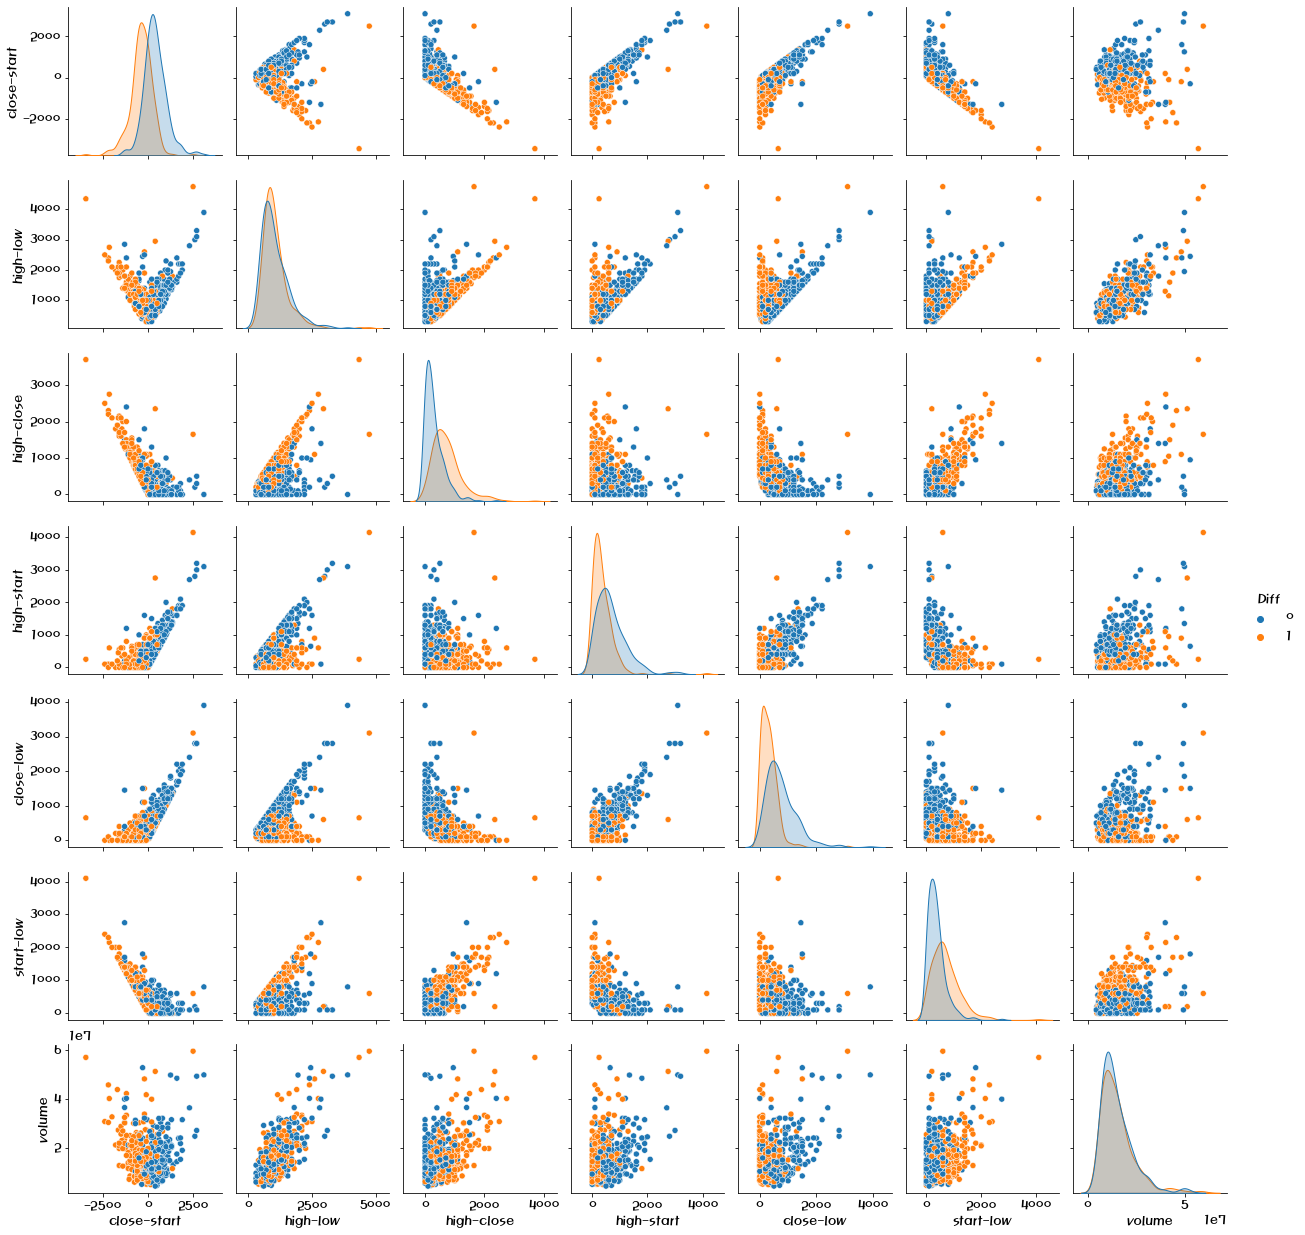

In [15]:
plt.rc('font', family=font_name, size=14) 

#상관도 그래프
sns.pairplot(data, hue='Diff')
plt.show()

어느 정도 구분이 되는 것은 사실이나, 겹치는 부분이 상당하다.  
따라서 이 또한 유의미하게 구분됐다고 볼 수는 없을 것 같다.   
하지만 기존 데이터보다는 구분이 잘 되고 있기 때문에 이 데이터를 기반으로 딥러닝을 진행하려 한다.  

=====================================================================================================================   
# 데이터 간의 상관관계

주가에 대한 예측은 보통 시계열 데이터를 기반으로 진행하기 때문에    
시계열 데이터로 가공되기 전 데이터만 놓고 분석하기에는 무리가 있다.  
이를 확인하기 위해 데이터 간의 상관관계를 시각화한다.  

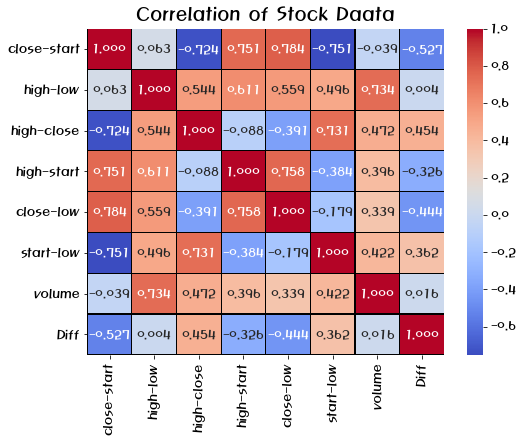

In [16]:
colormap = 'coolwarm' #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(8,6))  #그래프의 크기를 정합니다.

# 그래프의 속성을 결정 
# vmax의 값을 1로 지정 => 값이 1에 가까울 수록 붉은 색으로 표시된다
# 반대로, 1에서 멀수록 파란 색으로 표시된다.
# heatmap( ) 함수 : 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
# 두 항목이 전혀 다른 패턴으로 변화하고 있으면 0을, 서로 비슷한 패턴으로 변할수록 1에 가까운 값을 출력함

plt.title('Correlation of Stock Daata', fontsize=20)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1,cmap=colormap,linecolor='black',fmt='.3f',annot=True)
plt.show()

역시 한 눈에 볼 수 있는 큰 상관관계가 없음을 확인할 수 없다. => 주가 예측은 굉장히 복잡하다.

In [17]:
data.head()

,close-start,high-low,high-close,high-start,close-low,start-low,volume,Diff
0,100.0,450.0,250.0,350.0,200.0,100.0,10528665.0,0
1,-400.0,1050.0,450.0,50.0,600.0,1000.0,11224077.0,1
2,-400.0,800.0,750.0,350.0,50.0,450.0,11828104.0,1
3,700.0,750.0,0.0,700.0,750.0,50.0,11543389.0,0
4,-750.0,800.0,750.0,0.0,50.0,800.0,7678719.0,1


=====================================================================================================================   
# 데이터 스케일링

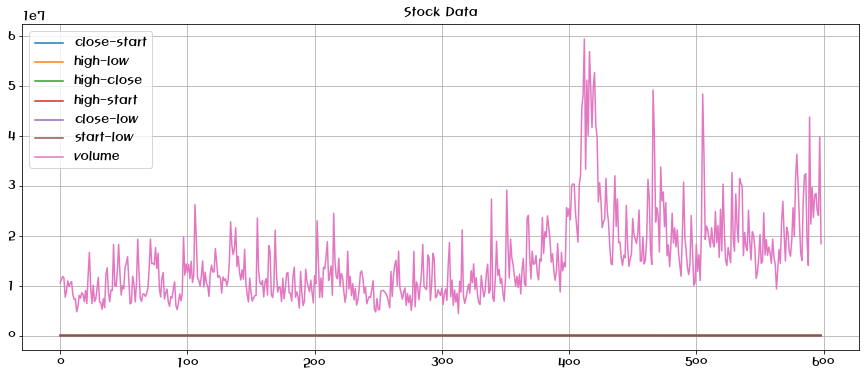

In [18]:
plt.figure(figsize=(15,6))
plt.title('Stock Data', fontsize=14)

plt.plot(data['close-start'])
plt.plot(data['high-low'])
plt.plot(data['high-close'])
plt.plot(data['high-start'])
plt.plot(data['close-low'])
plt.plot(data['start-low'])
plt.plot(data['volume'])

plt.legend(['close-start','high-low','high-close','high-start','close-low','start-low','volume']) # 범례
plt.grid()

plt.show()

거래량 데이터의 값들이 다른 속성에 비해 앞도적으로 크다. 이는 학습에 방해가 될 수도 있다.  
따라서 데이터 스케일링을 진행해야 한다. (정규화라고도 하던데, 그냥 스케일링이라고 하겠다.)

스케일링을 왜 하는가?

속성들 간의 값의 크기 차이가 클 경우 학습에 방해가 될 수 있다.  
따라서 모든 값들이 어떤 기준에 따라 일정 구간 사이에 값을 가지도록 하는 것이 스케일링이다.  

여기서는 sklearn(사이킷런)의 MinMaxScaler을 사용한다.

MinMaxAcaler : 최소값을 0, 최대값을 1로 설정하여 데이터가 0 ~ 1 사이의 값을 갖게 된다.

MinMaxScaler()가 데이터를 어떻게 계산해서 0 ~ 1 사이의 값을 만들어 내냐?  
X_scaled = (X - X.max) / (X.max - X.min) 으로 계산된다.

In [19]:
data_scaled=data

In [20]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data_scaled) # fit_transform = fit() + transform()

data_scaled=pd.DataFrame(data_scaled)

In [21]:
data_scaled

,0,1,2,3,4,5,6,7
0,0.541985,0.033708,0.067568,0.084337,0.051282,0.024390,0.111197,0.0
1,0.465649,0.168539,0.121622,0.012048,0.153846,0.243902,0.123828,1.0
2,0.465649,0.112360,0.202703,0.084337,0.012821,0.109756,0.134799,1.0
3,0.633588,0.101124,0.000000,0.168675,0.192308,0.012195,0.129628,0.0
4,0.412214,0.112360,0.202703,0.000000,0.012821,0.195122,0.059433,1.0
...,...,...,...,...,...,...,...,...
594,0.603053,0.292135,0.162162,0.265060,0.256410,0.121951,0.437442,0.0
595,0.450382,0.224719,0.324324,0.168675,0.025641,0.146341,0.374049,1.0
596,0.801527,0.359551,0.000000,0.433735,0.487179,0.024390,0.357297,0.0
597,0.557252,0.224719,0.243243,0.265060,0.102564,0.048780,0.644365,1.0


In [22]:
# 클래스에 소수점이 있어서 소수점을 제거
data_scaled[7]=data['Diff']

In [23]:
data_scaled

,0,1,2,3,4,5,6,7
0,0.541985,0.033708,0.067568,0.084337,0.051282,0.024390,0.111197,0
1,0.465649,0.168539,0.121622,0.012048,0.153846,0.243902,0.123828,1
2,0.465649,0.112360,0.202703,0.084337,0.012821,0.109756,0.134799,1
3,0.633588,0.101124,0.000000,0.168675,0.192308,0.012195,0.129628,0
4,0.412214,0.112360,0.202703,0.000000,0.012821,0.195122,0.059433,1
...,...,...,...,...,...,...,...,...
594,0.603053,0.292135,0.162162,0.265060,0.256410,0.121951,0.437442,0
595,0.450382,0.224719,0.324324,0.168675,0.025641,0.146341,0.374049,1
596,0.801527,0.359551,0.000000,0.433735,0.487179,0.024390,0.357297,0
597,0.557252,0.224719,0.243243,0.265060,0.102564,0.048780,0.644365,1


In [24]:
columns=['close-start','high-low','high-close','high-start','close-low','start-low','volume','Diff']
data_scaled.columns=columns  # column명이 없기 때문에 순서에 맞게 추가해준다.

data_scaled

,close-start,high-low,high-close,high-start,close-low,start-low,volume,Diff
0,0.541985,0.033708,0.067568,0.084337,0.051282,0.024390,0.111197,0
1,0.465649,0.168539,0.121622,0.012048,0.153846,0.243902,0.123828,1
2,0.465649,0.112360,0.202703,0.084337,0.012821,0.109756,0.134799,1
3,0.633588,0.101124,0.000000,0.168675,0.192308,0.012195,0.129628,0
4,0.412214,0.112360,0.202703,0.000000,0.012821,0.195122,0.059433,1
...,...,...,...,...,...,...,...,...
594,0.603053,0.292135,0.162162,0.265060,0.256410,0.121951,0.437442,0
595,0.450382,0.224719,0.324324,0.168675,0.025641,0.146341,0.374049,1
596,0.801527,0.359551,0.000000,0.433735,0.487179,0.024390,0.357297,0
597,0.557252,0.224719,0.243243,0.265060,0.102564,0.048780,0.644365,1


=====================================================================================================================   
# 스케일링한 데이터 저장

In [25]:
import os
os.getcwd()

'D:\\ai\\Final'

In [26]:
file_name_scaled=input("검색 결과를 csv 타입으로 저장할 경로와 파일명은? (예 : D:\\ai\\Final\\Data set_2.csv) : ")

data_scaled.to_csv(file_name_scaled,encoding='utf-8-sig',index=False)

검색 결과를 csv 타입으로 저장할 경로와 파일명은? (예 : D:\ai\Final\Data set_2.csv) : D:\ai\Final\Data set_2.csv
